## **Proyek Predictive Analytic Arif Kurniawan**

# Import Library

In [106]:
pip install --upgrade ipywidgets


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler


# Data Understanding

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

## Data Loading

Data Loading merupakan tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami. Untuk informasi datasets ini telah di bersihan dan normalisasi terlebih dahulu

In [108]:
#dataset
df = pd.read_csv('crop_recommendation_dataset.csv')
df.head()

Temperature  Humidity  Rainfall   PH  Nitrogen  Phosphorous  Potassium  \
0        20.88     82.00    202.94 6.50     69.30        79.50      94.44   
1        21.77     80.32    226.66 7.04     72.02       141.82     141.70   
2        23.00     82.32    263.96 7.63     77.77        59.39      81.89   
3        26.49     80.28    242.86 6.98     78.65       147.46     142.94   
4        20.28     81.60    262.72 7.63     73.98        68.95      95.74   

   Carbon        Soil  Crop  
0    0.63  Loamy Soil  rice  
1    1.40  Loamy Soil  rice  
2    1.80  Peaty Soil  rice  
3    1.43  Loamy Soil  rice  
4    1.75  Peaty Soil  rice

# Exploratory Data Analysis (EDA)

Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

## Deskripsi Variabel

In [109]:
#melihat jumlah data keseluruhan
df.shape

(3100, 10)

Dari data di atas dapat melihat bahwa pada dataset ini terdapat 3100 baris dan 10 kolom. Diantaranya:

```Temperature```: Suhu udara (°C) yang memengaruhi pertumbuhan tanaman.

```Humidity```: Kelembapan udara (%) yang berpengaruh pada proses transpirasi.

```Rainfall```: Curah hujan (mm), penting untuk kebutuhan air tanaman.

```PH```: Tingkat keasaman tanah, memengaruhi penyerapan unsur hara.

```Nitrogen```: Kandungan nitrogen, mendukung pertumbuhan daun.

```Phosphorous```: Kandungan fosfor, penting untuk akar dan pembungaan.

```Potassium```: Kandungan kalium, membantu ketahanan tanaman.

```Carbon```: Kandungan karbon organik, meningkatkan kesuburan tanah.

```Soil```: Jenis tanah (misal: lempung, pasir), memengaruhi struktur dan drainase.

```Crop```: Jenis tanaman yang menjadi target prediksi.

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  3100 non-null   float64
 1   Humidity     3100 non-null   float64
 2   Rainfall     3100 non-null   float64
 3   PH           3100 non-null   float64
 4   Nitrogen     3100 non-null   float64
 5   Phosphorous  3100 non-null   float64
 6   Potassium    3100 non-null   float64
 7   Carbon       3100 non-null   float64
 8   Soil         3100 non-null   object 
 9   Crop         3100 non-null   object 
dtypes: float64(8), object(2)
memory usage: 242.3+ KB


* Terdapat 7 kolom numerik dengan tipe float64, yaitu: temperatur, humidity, rainfall, ph, nitrogen, phosphorous, potassium dan carbon color, dan clarity. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.

* Terdapat 2 kolom dengan tipe data object yaitu: soil dan crop. Kolom ini merupakan categorical features (fitur non-numerik).

In [111]:
df.describe()

Temperature  Humidity  Rainfall      PH  Nitrogen  Phosphorous  \
count      3100.00   3100.00   3100.00 3100.00   3100.00      3100.00   
mean         27.11     66.01    110.21    6.37     61.24        70.20   
std           7.55     24.00     63.89    0.80      8.39        34.90   
min           9.94     10.20     20.76    3.69     50.58        32.90   
25%          22.81     55.37     65.00    5.90     55.39        45.25   
50%          26.09     68.92     97.06    6.34     59.27        57.64   
75%          29.34     84.45    141.21    6.84     64.96        82.21   
max          54.78     99.65    385.09    9.41     96.20       149.10   

       Potassium  Carbon  
count    3100.00 3100.00  
mean       69.55    1.48  
std        29.46    0.58  
min        41.84    0.50  
25%        50.76    0.98  
50%        56.89    1.47  
75%        73.59    1.98  
max       149.22    2.50

Fungsi ```describe()``` memberikan informasi statistik pada masing-masing kolom, antara lain:

* ```Count``` adalah jumlah sampel pada data.
* ```Mean``` adalah nilai rata-rata.
* ```Std``` adalah standar deviasi.
* ```Min``` yaitu nilai minimum setiap kolom.
* ```25%``` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* ```50%``` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* ```75%``` adalah kuartil ketiga.
* ```Max``` adalah nilai maksimum.

# Missing Value

In [112]:
df.duplicated().sum()

np.int64(0)

Melihat apakah terdapat data yang terduplikat.

In [113]:
df.Crop.value_counts(normalize=True)

Crop
rice           0.03
wheat          0.03
Mung Bean      0.03
Tea            0.03
millet         0.03
maize          0.03
Lentil         0.03
Jute           0.03
Coffee         0.03
Cotton         0.03
Ground Nut     0.03
Peas           0.03
Rubber         0.03
Sugarcane      0.03
Tobacco        0.03
Kidney Beans   0.03
Moth Beans     0.03
Coconut        0.03
Black gram     0.03
Adzuki Beans   0.03
Pigeon Peas    0.03
Chickpea       0.03
banana         0.03
grapes         0.03
apple          0.03
mango          0.03
muskmelon      0.03
orange         0.03
papaya         0.03
pomegranate    0.03
watermelon     0.03
Name: proportion, dtype: float64

In [114]:
df.isnull().sum()


Temperature    0
Humidity       0
Rainfall       0
PH             0
Nitrogen       0
Phosphorous    0
Potassium      0
Carbon         0
Soil           0
Crop           0
dtype: int64

In [115]:
data_miss = df[df.isnull().any(axis=1)]
data_miss

Empty DataFrame
Columns: [Temperature, Humidity, Rainfall, PH, Nitrogen, Phosphorous, Potassium, Carbon, Soil, Crop]
Index: []

pada data ini tidak terdapat duplicate

In [116]:
df.dropna(inplace=True)
df.isnull().sum().sum()

np.int64(0)

In [117]:
df.describe()

Temperature  Humidity  Rainfall      PH  Nitrogen  Phosphorous  \
count      3100.00   3100.00   3100.00 3100.00   3100.00      3100.00   
mean         27.11     66.01    110.21    6.37     61.24        70.20   
std           7.55     24.00     63.89    0.80      8.39        34.90   
min           9.94     10.20     20.76    3.69     50.58        32.90   
25%          22.81     55.37     65.00    5.90     55.39        45.25   
50%          26.09     68.92     97.06    6.34     59.27        57.64   
75%          29.34     84.45    141.21    6.84     64.96        82.21   
max          54.78     99.65    385.09    9.41     96.20       149.10   

       Potassium  Carbon  
count    3100.00 3100.00  
mean       69.55    1.48  
std        29.46    0.58  
min        41.84    0.50  
25%        50.76    0.98  
50%        56.89    1.47  
75%        73.59    1.98  
max       149.22    2.50

In [118]:
label_encoder = LabelEncoder()
df['Soil_encoded'] = label_encoder.fit_transform(df['Soil'])


In [119]:
df = df.drop('Soil', axis=1)


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   3100 non-null   float64
 1   Humidity      3100 non-null   float64
 2   Rainfall      3100 non-null   float64
 3   PH            3100 non-null   float64
 4   Nitrogen      3100 non-null   float64
 5   Phosphorous   3100 non-null   float64
 6   Potassium     3100 non-null   float64
 7   Carbon        3100 non-null   float64
 8   Crop          3100 non-null   object 
 9   Soil_encoded  3100 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 242.3+ KB


Jumlah data Float64 ada 7, int64 ada 1 dan object ada 1.

In [121]:
df["Soil_encoded"] = df["Soil_encoded"].astype("float64")

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   3100 non-null   float64
 1   Humidity      3100 non-null   float64
 2   Rainfall      3100 non-null   float64
 3   PH            3100 non-null   float64
 4   Nitrogen      3100 non-null   float64
 5   Phosphorous   3100 non-null   float64
 6   Potassium     3100 non-null   float64
 7   Carbon        3100 non-null   float64
 8   Crop          3100 non-null   object 
 9   Soil_encoded  3100 non-null   float64
dtypes: float64(9), object(1)
memory usage: 242.3+ KB


Dapat di lihat:

Jumlah data Float64 ada 9 dan object ada 1.

**Visualisasi Outlier**

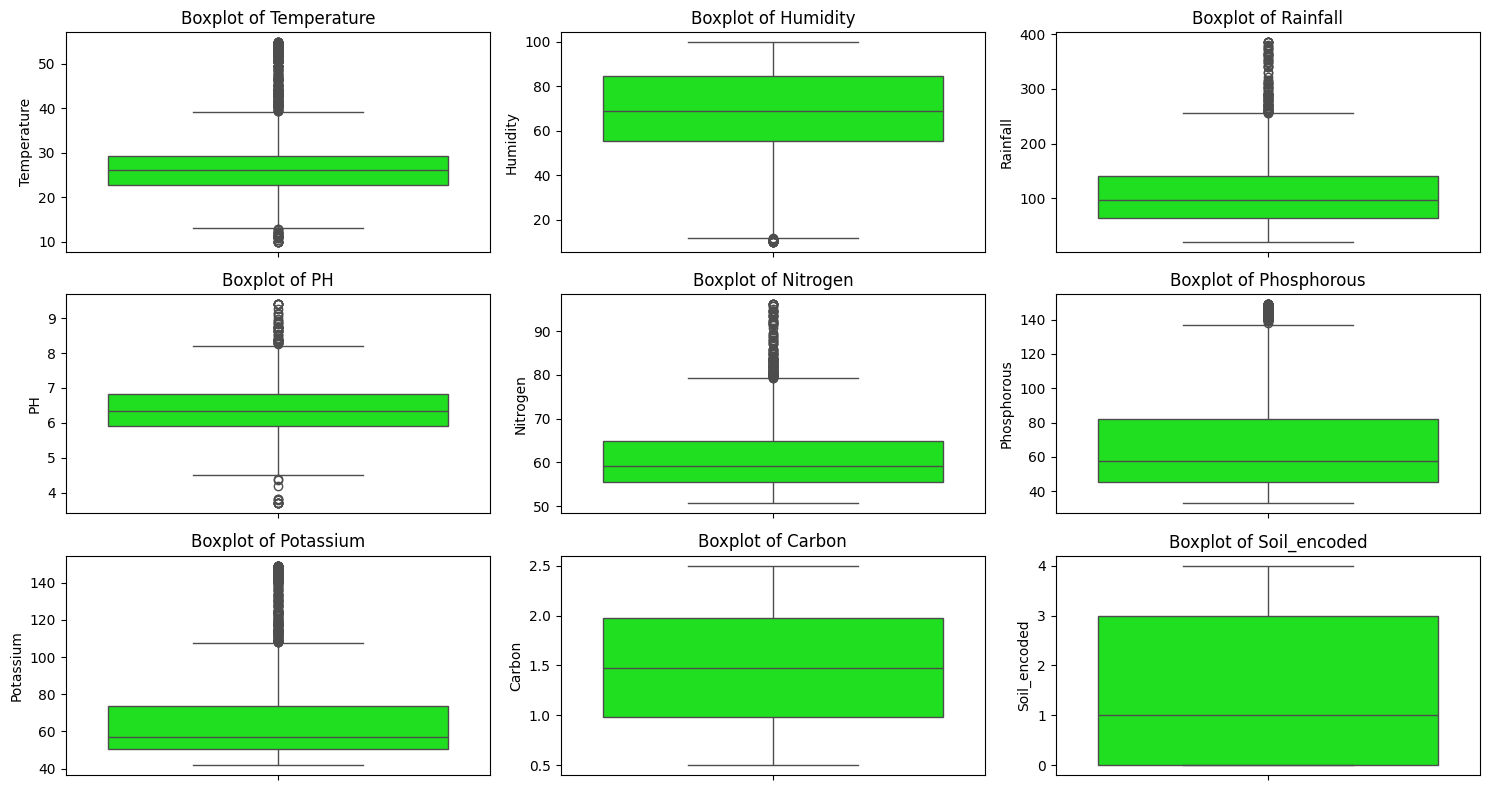

In [123]:
# Boxplots to detect outliers
plt.figure(figsize=(15,8))
# Change the subplot layout to 3 rows and 3 columns to accommodate 9 plots
for i, col in enumerate(['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon', 'Soil_encoded']):
    plt.subplot(3,3,i+1) # Changed from (2,4,i+1) to (3,3,i+1)
    sns.boxplot(y=df[col],color='lime')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Menghapus outliers yang ada pada dataset

Pada kasus ini, kita akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, menangani outliers dengan teknik IQR method.

In [124]:
# IQR Method to identify and cap Outliers
def cap_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


for col in ['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon','Soil_encoded']:
    cap_outliers(df, col)


In [125]:
df.shape

(3100, 10)

Jumlah Datasets setalah di cek tidak mengalami perubahan pada Outlier dan masih pemprosesan sebelumnya: 3100, 10

## Univariate Analysis

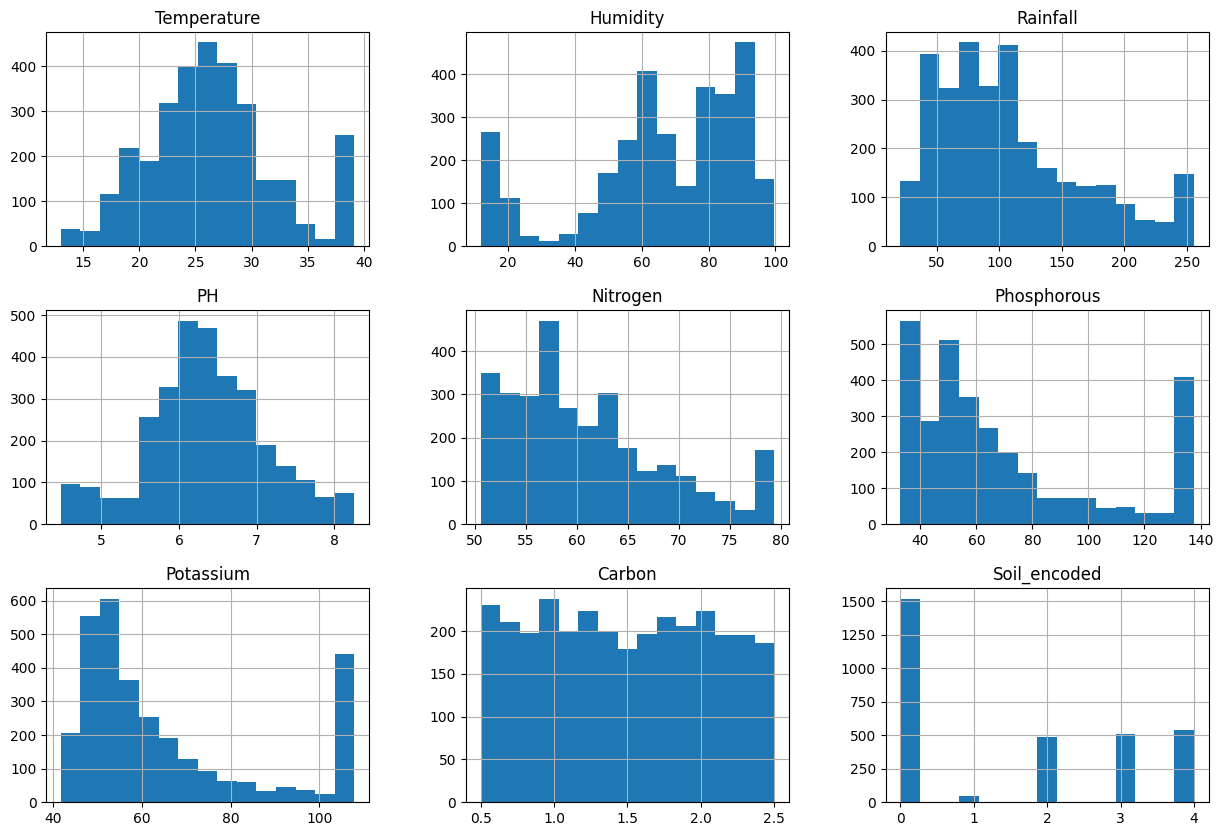

In [126]:
# Histograms for the numerical cols
df[['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon','Soil_encoded']].hist(bins=15, figsize=(15, 10))
plt.show()


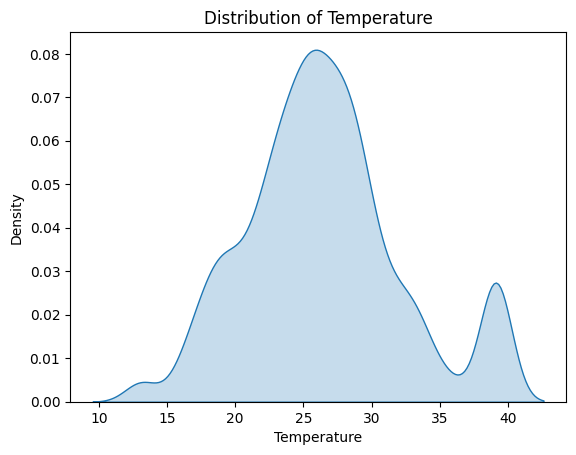

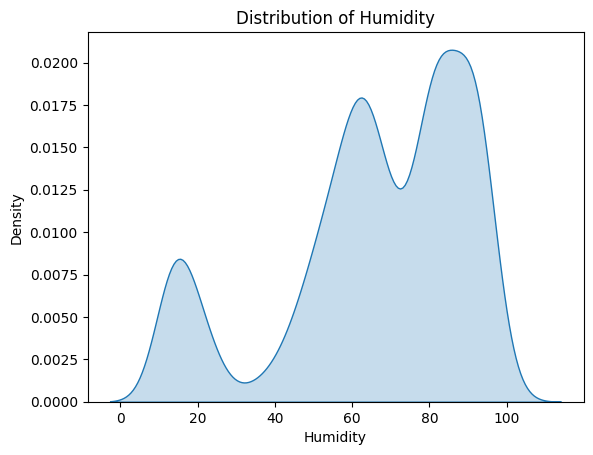

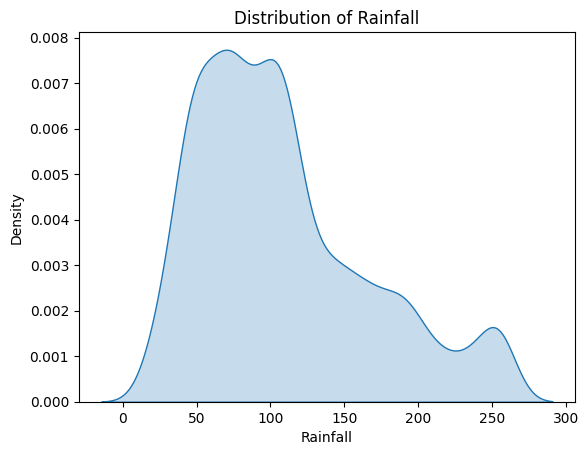

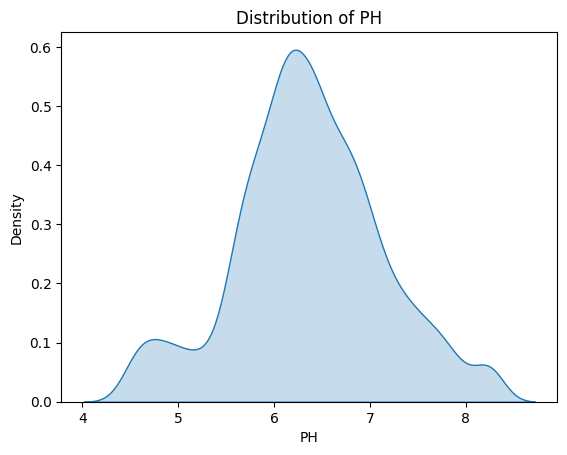

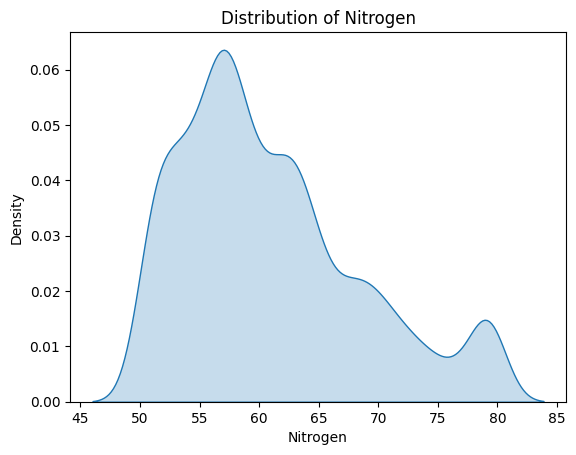

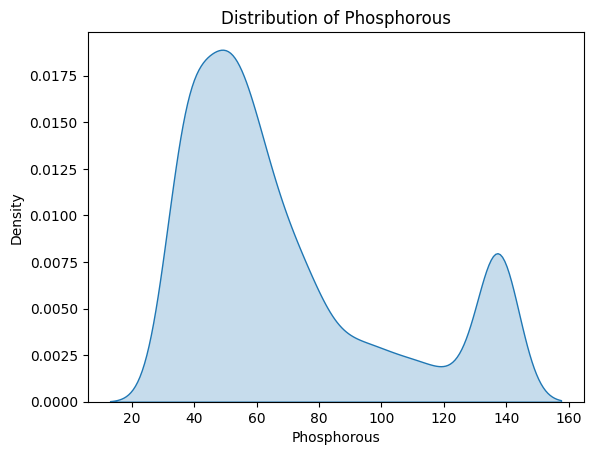

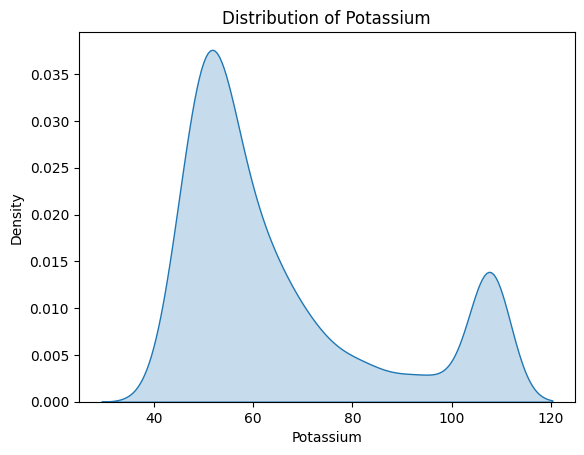

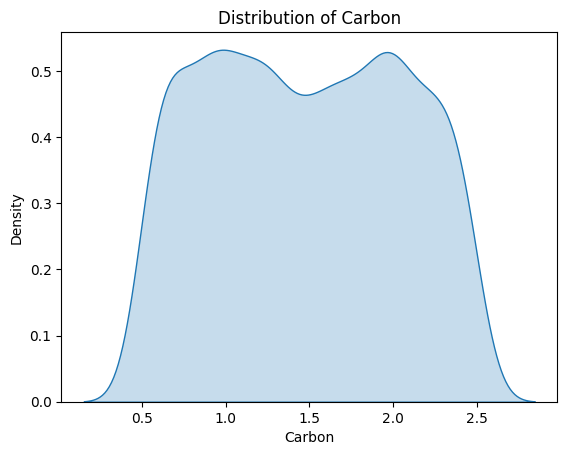

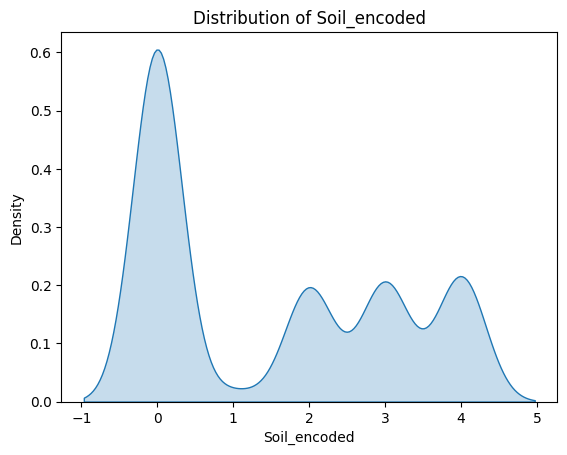

In [127]:
# KDE plots for numerical features
for col in['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon','Soil_encoded']:
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.show()


## Multivariate Analysis

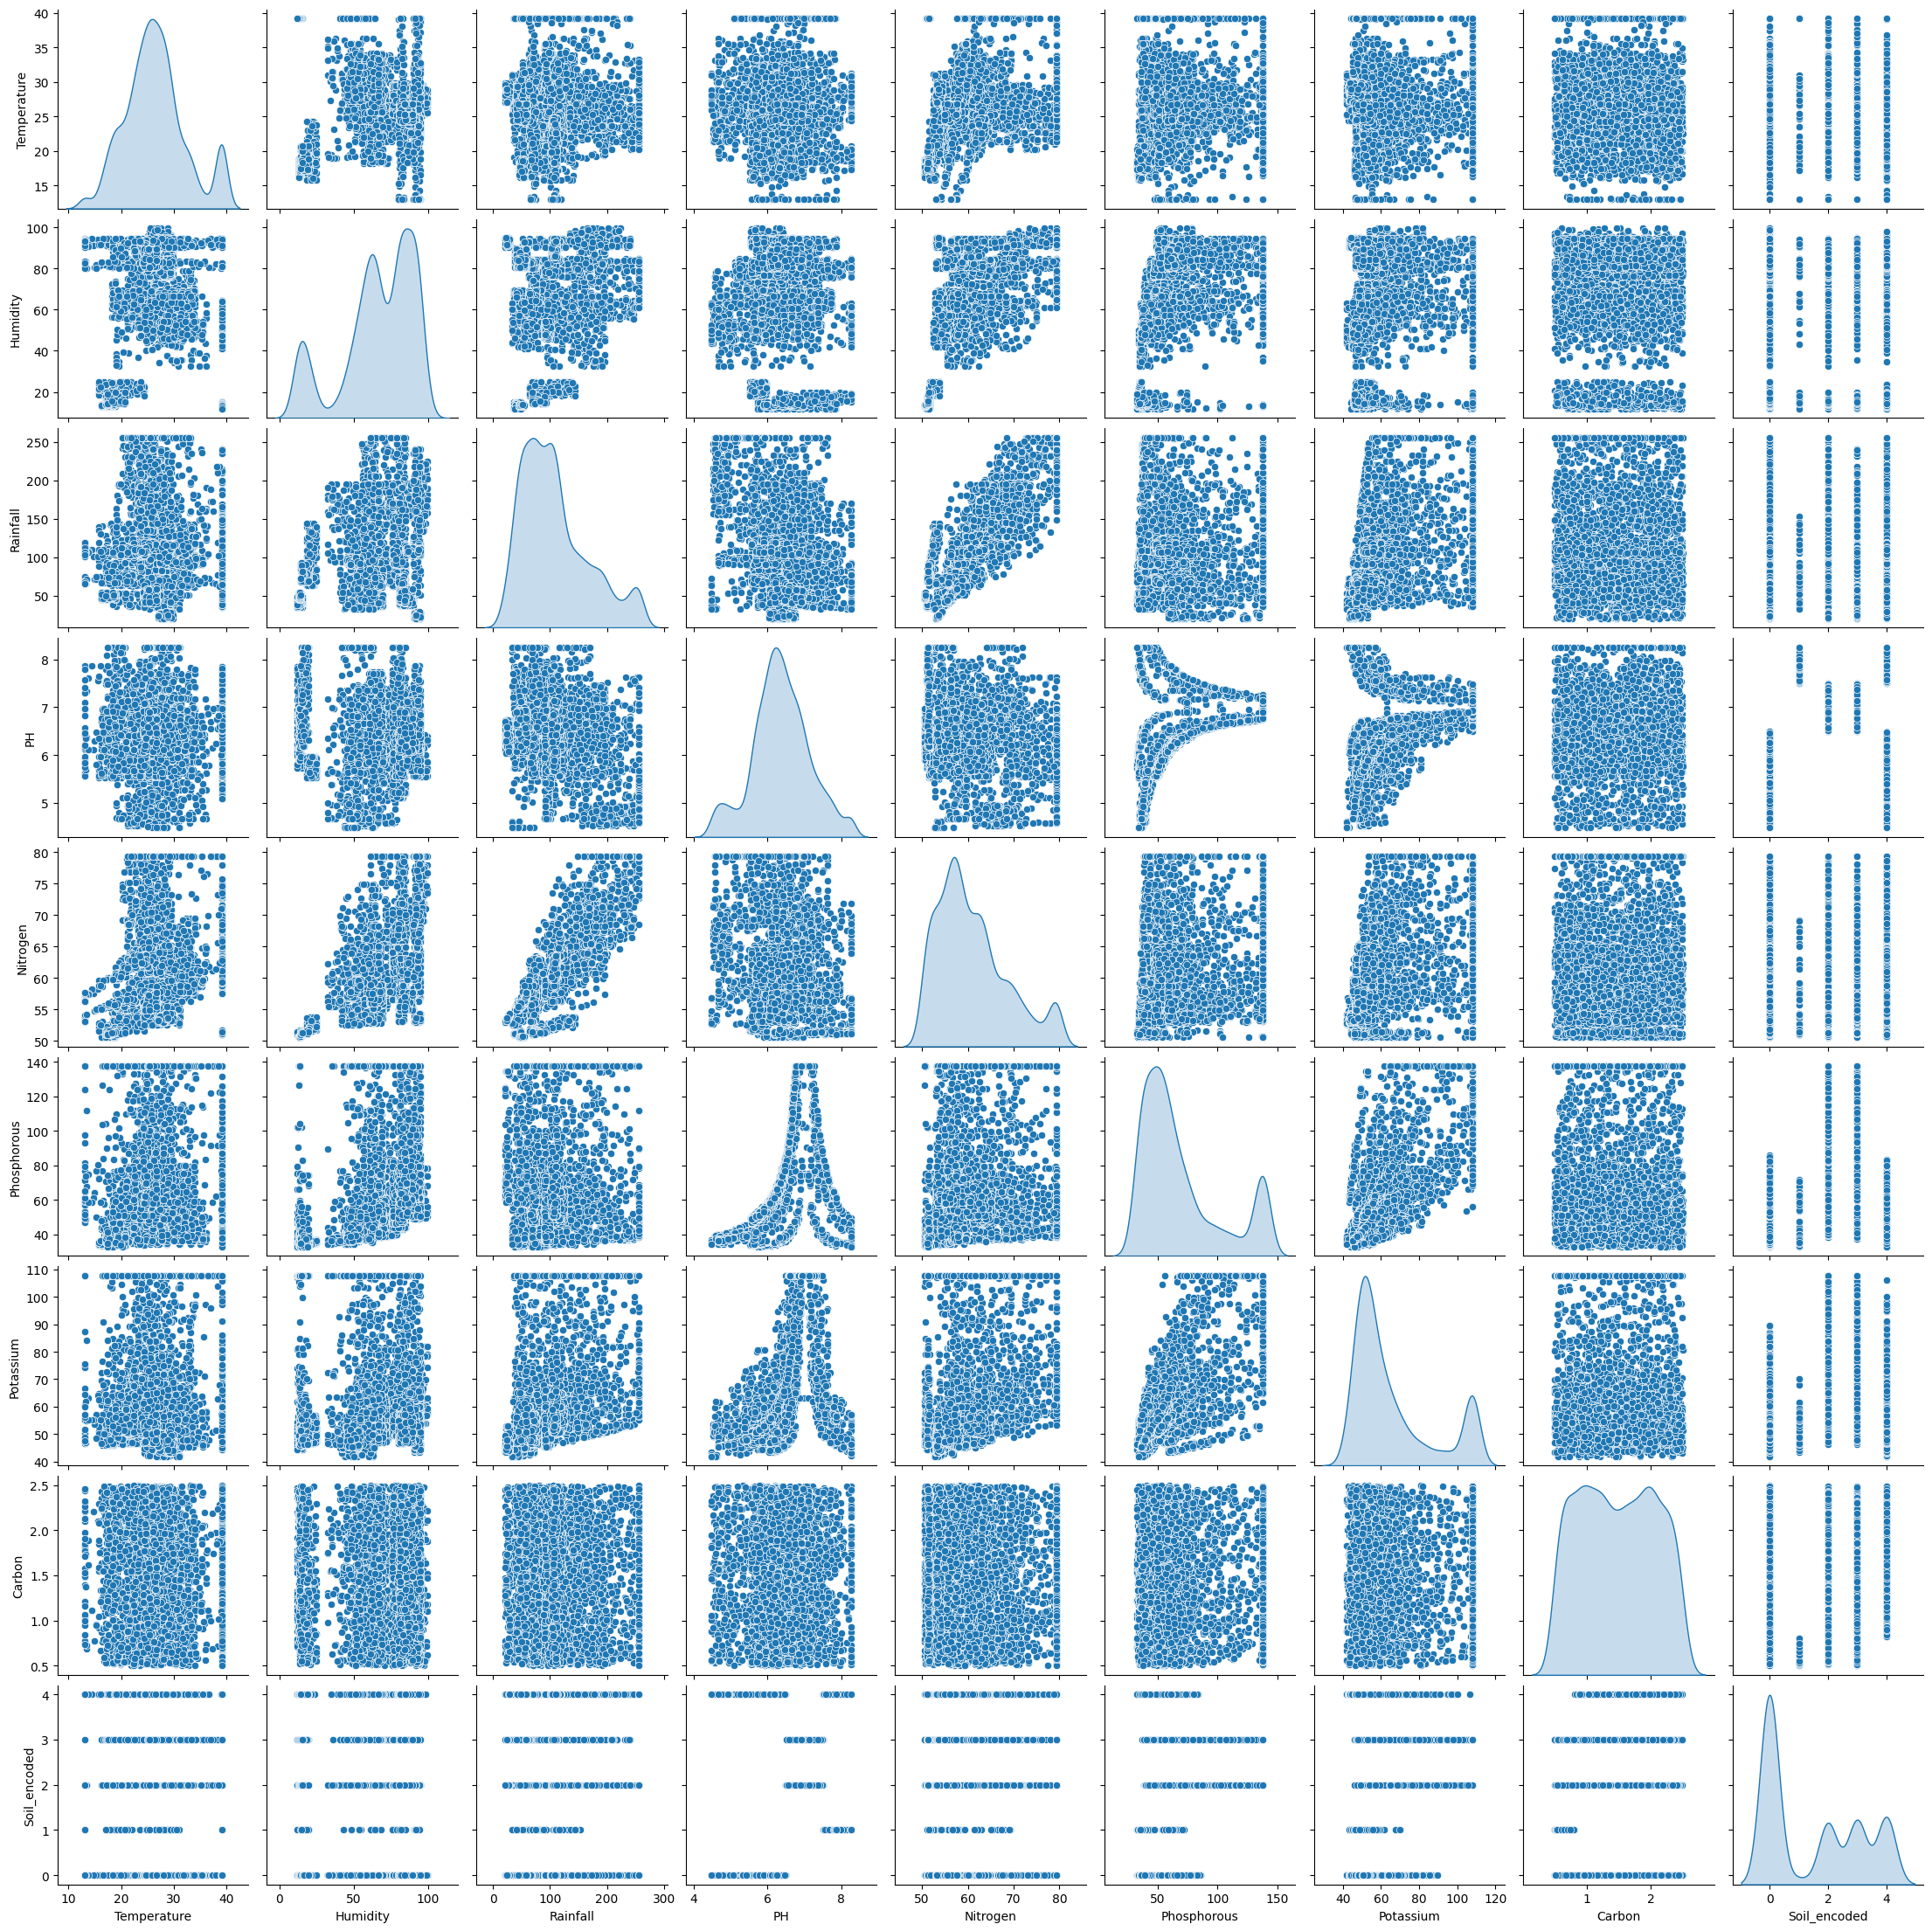

In [128]:
sns.pairplot(df, diag_kind = 'kde')
df[['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon', 'Soil_encoded']]
plt.show()

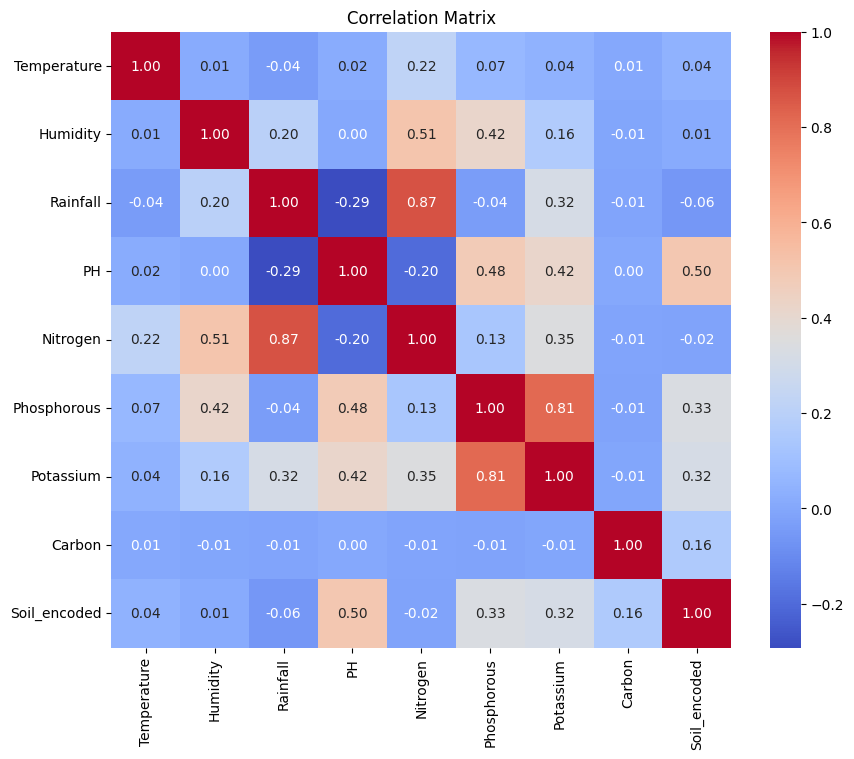

In [129]:
# Select only numeric cols
numeric_data = df.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

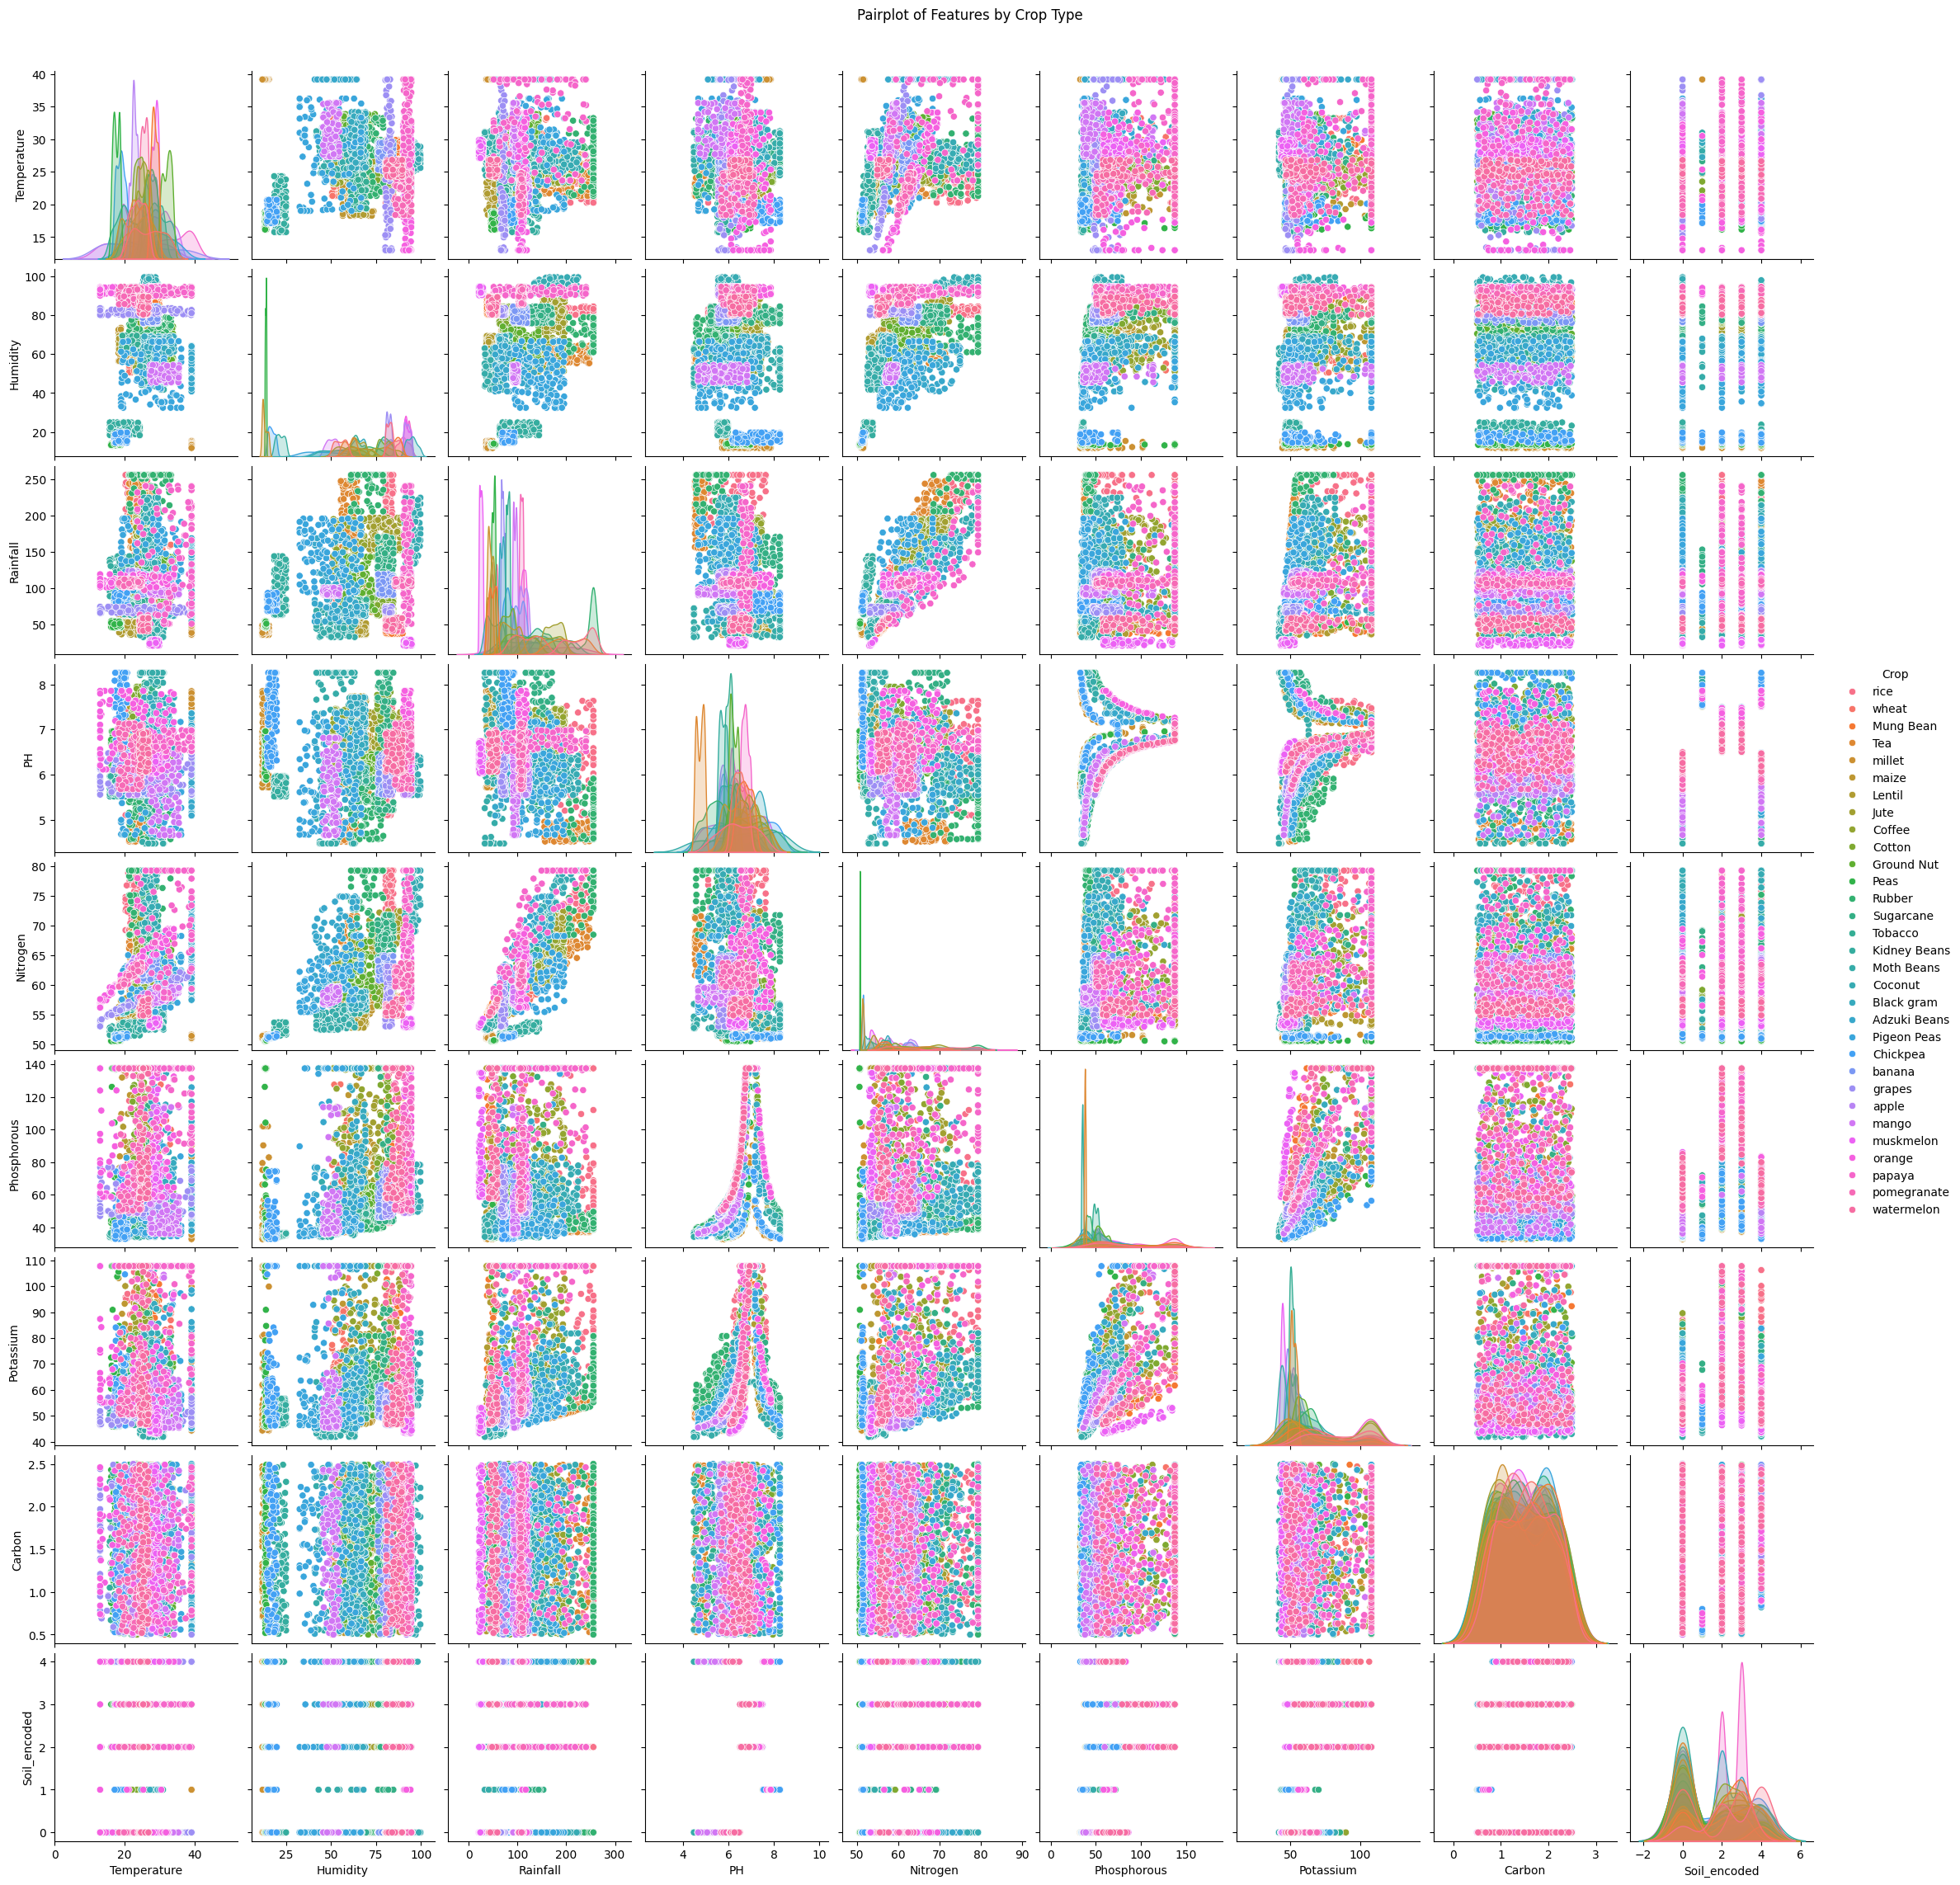

In [130]:
# Pairplot
sns.pairplot(
    df,
    vars=['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon','Soil_encoded'],
    hue='Crop',
    palette='husl'
)
plt.suptitle("Pairplot of Features by Crop Type", y=1.02)
plt.show()

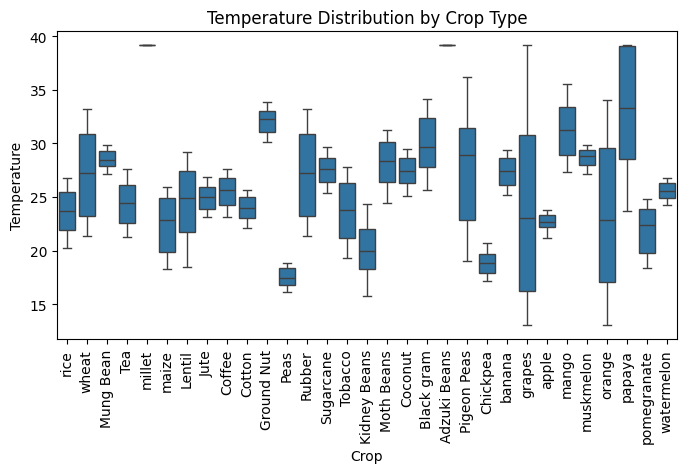

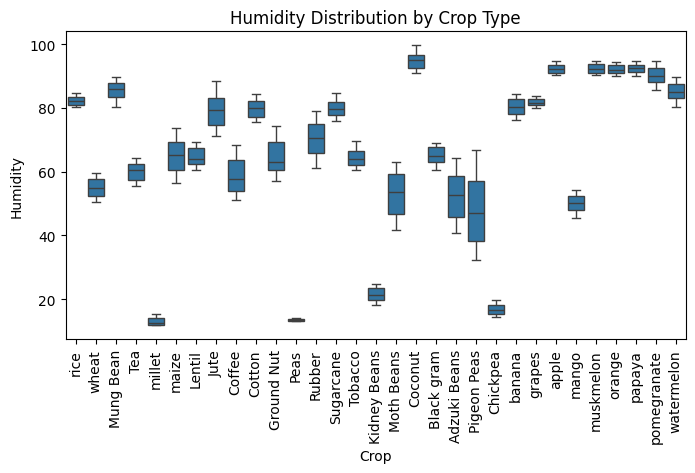

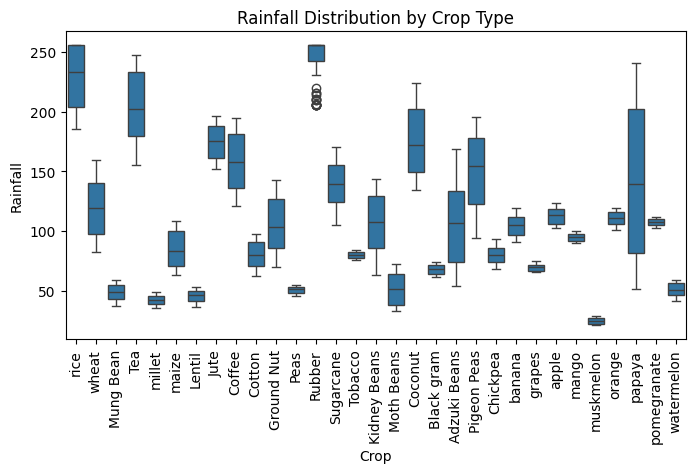

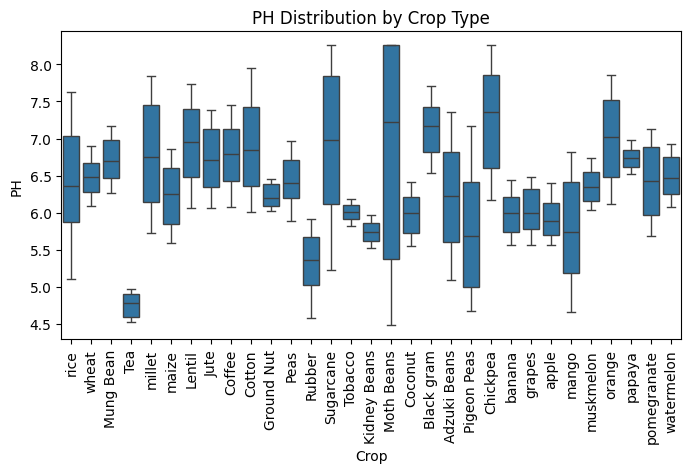

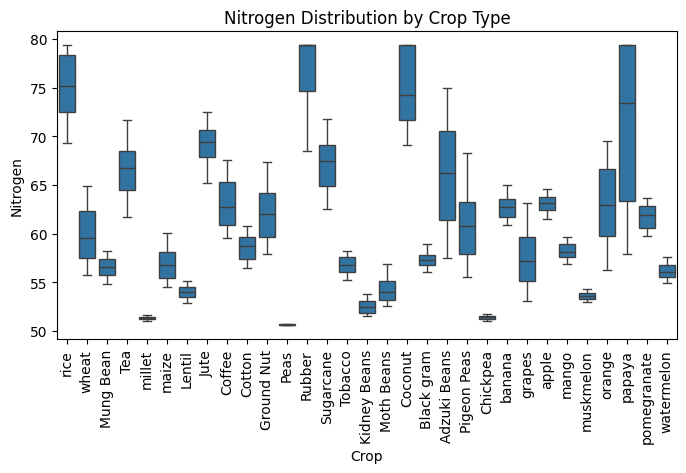

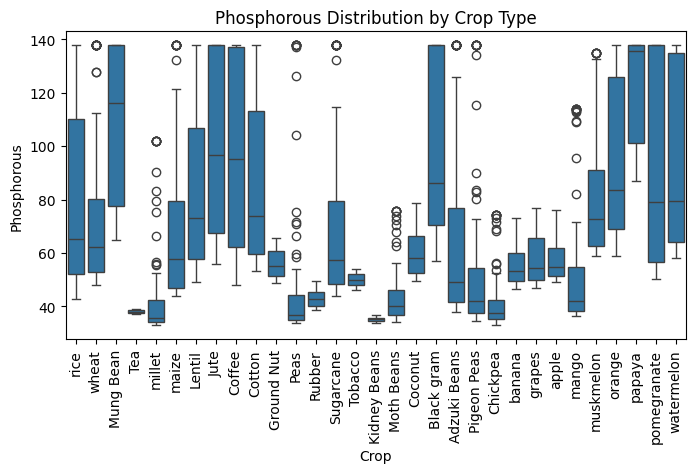

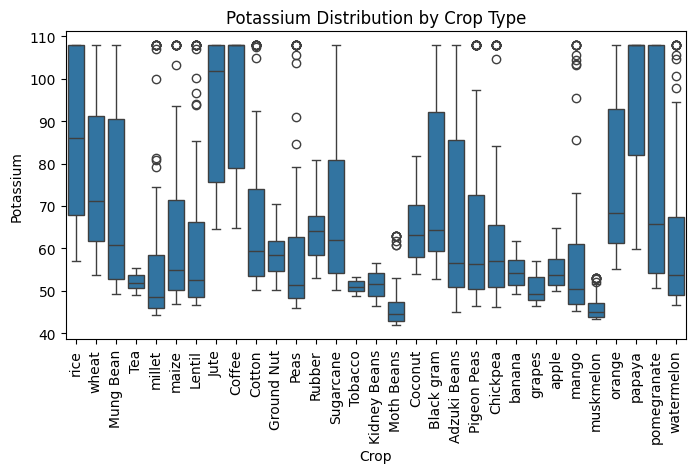

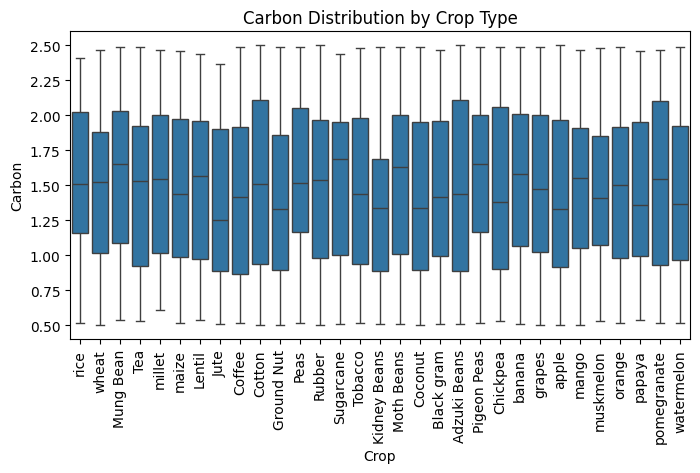

In [131]:
# Boxplots of features grouped by crop
for col in ['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Crop', y=col, data=df)
    plt.xticks(rotation=90)
    plt.title(f'{col} Distribution by Crop Type')
    plt.show()

# Data Preparation

Data Preparation merupakan tahap untuk mempersiapkan data sebelum masuk ke tahap pembuatan model Machine Learning.

## Data Clening

In [132]:
label_encoder = LabelEncoder()
df['crop'] = label_encoder.fit_transform(df['Crop'])

In [133]:
y = df['crop']

In [134]:
X = df.drop(columns=['Crop', 'crop'])

## Train-Test-Split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [137]:


print(f'Total dataset: {len(X_train) + len(X_test)}')
print(f'Total data latih: {len(X_train)}')
print(f'Total data uji: {len(X_test)}')

Total dataset: 3100
Total data latih: 2480
Total data uji: 620


## Normalisasi

In [138]:
scaler = MinMaxScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

# Model

Lazy Predict Library
LazyPredict adalah pustaka Python yang memudahkan proses pemilihan model machine learning. Ia melakukan ini dengan secara otomatis mengevaluasi dan membandingkan berbagai algoritma pembelajaran mesin pada kumpulan data.

Keuntungan menggunakan LazyPredict:
* Cepat dan efisien: LazyPredict dapat dengan cepat mengevaluasi dan membandingkan banyak model, menghemat waktu dan tenaga.
* Mempermudah identifikasi model potensial: Alih-alih mencoba berbagai model secara manual, LazyPredict membantu menemukan model yang berpotensi berkinerja baik pada data.
* Cocok untuk analisis awal dan pembuatan prototipe: LazyPredict memudahkan untuk memulai dengan proyek machine learning dengan cepat tanpa terjebak dalam detail pemilihan model.

In [166]:
!pip install lazypredict

In [167]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier()
models,predicts = clf.fit(x_train,x_test,y_train,y_test)
print(models.sort_values(by="Accuracy",ascending=False))

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 2480, number of used features: 9
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] 

**Visualisasi Model LazyPredict**

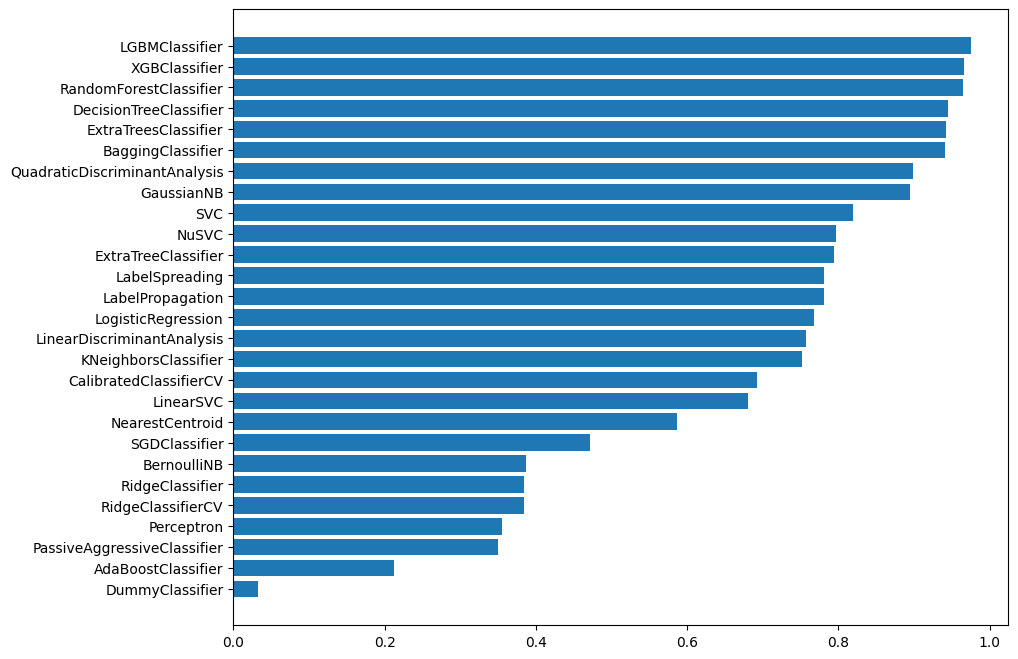

In [168]:
temp = models.sort_values(by="Accuracy",ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(temp.index,temp["Accuracy"])
plt.show()


In [169]:
models = pd.DataFrame(index=['accuracy_score'],
                      columns=['KNN', 'RandomForest'])



**KNN (K-Nearest Neighbor)**

In [170]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
model_knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [171]:
knn_pred = model_knn.predict(x_test)
models.loc['accuracy_score','KNN'] = accuracy_score(y_test, knn_pred)

 **Random Forest**

In [172]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [173]:
y_pred = model_rf.predict(X_test)
models.loc['accuracy_score','RandomForest'] = accuracy_score(y_test, y_pred)


# Evaluasi Model

**Score Model**

In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Evaluasi untuk semua model
metrics = {
    "Model": ["KNN", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, y_pred),
    ],
    "Precision": [
        precision_score(y_test, knn_pred, average='weighted'),
        precision_score(y_test, y_pred, average='weighted'),
    ],
    "Recall": [
        recall_score(y_test, knn_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
    ],
    "F1 Score": [
        f1_score(y_test, knn_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted'),
    ]
}

# Tampilkan dalam tabel
df_metrics = pd.DataFrame(metrics)
print(df_metrics)

           Model  Accuracy  Precision  Recall  F1 Score
0            KNN      0.75       0.76    0.75      0.74
1  Random Forest      0.96       0.97    0.96      0.96


**Plot Model**

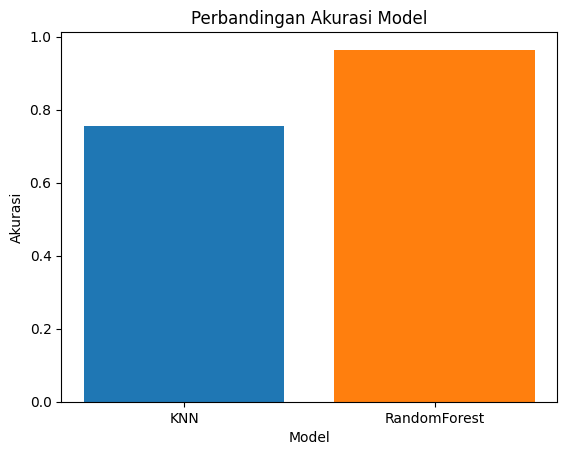

In [180]:
plt.bar('KNN', models['KNN'])
plt.bar('RandomForest', models['RandomForest'])
plt.title("Perbandingan Akurasi Model");
plt.xlabel('Model');
plt.ylabel('Akurasi');
plt.show()